Módulo 3
 

 Fase 1: Exploración y Limpieza
 . Exploración Inicial:
 Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
 nulos, atípicos o datos faltantes en las columnas relevantes.
 Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
 presencia de valores nulos y estadísticas básicas de las columnas involucradas.
 Une los dos conjuntos de datos de la forma más eficiente.

In [25]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------------- ------ 51.2/60.8 kB 890.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 815.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.9 MB 3.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.9 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.9 MB 7.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.9 MB 9.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/8.9 MB 9.8 MB/s eta 0:00:01
   ------------ --------------------------- 2.7/8.9 MB 10.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.2/8.9 MB 10.2 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/8.9 MB 10.4 MB/s eta 0:00:01
   ------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import numpy as np 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer #Para gestionar los nulos

from scipy.stats import shapiro, kstest #para evaluar linealidad de las relaciones entre las variables
from itertools import combinations #para las medidas de correlación


In [ ]:
df_activity = pd.read_csv("Customer Flight Activity.csv", index_col = None)
df_activity.head() #abro los csv y les asigno una variable


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [29]:
df_history= pd.read_csv("Customer Loyalty History.csv")
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [ ]:
# Función para exploración inicial
def explo_inicial(df):
    print("Primeras filas:")
    display(df.head())

    print("Distribución del DataFrame:")
    print(df.shape)

    print("Información general:")
    df.info()

    print("Tipos de datos por columna:")
    print(df.dtypes)

    print("Columnas:")
    print(df.columns.tolist())

    print("Valores nulos por columna:")
    display(df.isnull().sum())

    print("Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Duplicadas: {dup_count}")
    if dup_count > 0:
        display(df[df.duplicated()].head())
    else:
        print("No hay filas duplicadas.")

    print("Descripción de las columnas numéricas:")
    display(df.describe().T)

In [37]:
explo_inicial(df_activity)

Primeras filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


Distribución del DataFrame:
(405624, 10)
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
Tipos de datos por columna:
Loyalty Number                   int64
Y

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Filas duplicadas:
Duplicadas: 1864


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0


Descripción de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [38]:
explo_inicial(df_history)

Primeras filas:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


Distribución del DataFrame:
(16737, 16)
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

Filas duplicadas:
Duplicadas: 0
No hay filas duplicadas.
Descripción de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [ ]:
#no hay nulos en activity

In [39]:
# Ahora calculo el porcentaje de nulos que tengo para cada columna de df_history (ya que en activity no hay)
porc_nulos = (df_history.isnull().sum() / df_history.shape[0]) * 100
porc_nulos

# Lo convierto a DataFrame
df_nulos_history = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# Filtro el DataFrame para quedarme solo con aquellas columnas que tengan nulos
df_nulos_history[df_nulos_history["%_nulos"] > 0]

,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [41]:
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [44]:
df_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [ ]:
# Eliminamos estas dos columnas porque tienen casi el 88% de nulos 
df_history.drop(columns=['Cancellation Year', 'Cancellation Month'], inplace=True)

In [ ]:
df_history.columns  #para comprobar que estas dos columnas ya no están en el df

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month'],
      dtype='object')

In [47]:
df_flight = pd.merge(df_activity, df_history, on="Loyalty Number", how='inner')

In [48]:
df_flight

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,...,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,...,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,...,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5
405620,999911,2018,12,0,0,0,0,0.0,0,0,...,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8
405621,999940,2018,12,3,0,3,1233,123.0,0,0,...,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7
405622,999982,2018,12,0,0,0,0,0.0,0,0,...,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7


In [49]:
explo_inicial(df_flight)

Primeras filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,...,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,...,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1


Distribución del DataFrame:
(405624, 23)
Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
dtype: int64

Filas duplicadas:
Duplicadas: 1864


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
42,101902,2017,1,0,0,0,0,0.0,0,0,...,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1
227,112142,2017,1,0,0,0,0,0.0,0,0,...,K8T 5M5,Male,Bachelor,93073.0,Single,Aurora,16272.74,Standard,2015,7
478,126100,2017,1,0,0,0,0,0.0,0,0,...,E3B 2H2,Female,Master,121261.0,Divorced,Nova,17790.41,Standard,2013,11
567,130331,2017,1,0,0,0,0,0.0,0,0,...,B3J 9S2,Female,Bachelor,79207.0,Divorced,Nova,2862.73,Standard,2016,12
660,135421,2017,1,0,0,0,0,0.0,0,0,...,B3C 2M8,Female,Bachelor,91156.0,Married,Aurora,17441.64,Standard,2017,1


Descripción de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


In [50]:
# ahora vamos a ver los duplicados
duplicados = df_flight.duplicated()
print("Número de filas duplicadas:", duplicados.sum())

Número de filas duplicadas: 1864


In [ ]:
# Para ver las filas duplicadas que coinciden al 100% para eliminaras y dejar más limpio el nuevo df
df_flight[df_flight.duplicated()]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
42,101902,2017,1,0,0,0,0,0.0,0,0,...,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1
227,112142,2017,1,0,0,0,0,0.0,0,0,...,K8T 5M5,Male,Bachelor,93073.0,Single,Aurora,16272.74,Standard,2015,7
478,126100,2017,1,0,0,0,0,0.0,0,0,...,E3B 2H2,Female,Master,121261.0,Divorced,Nova,17790.41,Standard,2013,11
567,130331,2017,1,0,0,0,0,0.0,0,0,...,B3J 9S2,Female,Bachelor,79207.0,Divorced,Nova,2862.73,Standard,2016,12
660,135421,2017,1,0,0,0,0,0.0,0,0,...,B3C 2M8,Female,Bachelor,91156.0,Married,Aurora,17441.64,Standard,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0,...,S6J 3G0,Female,College,NaN,Married,Star,2563.58,Standard,2012,7
404884,960050,2018,12,0,0,0,0,0.0,0,0,...,K8T 5M5,Female,Bachelor,103151.0,Single,Aurora,8622.84,Standard,2015,12
405111,971370,2018,12,0,0,0,0,0.0,0,0,...,P2T 6G3,Male,Bachelor,63791.0,Married,Aurora,5261.04,Standard,2012,7
405410,988392,2018,12,0,0,0,0,0.0,0,0,...,V6E 3D9,Male,College,NaN,Single,Aurora,9022.08,Standard,2012,5


In [52]:
# Elimino las filas duplicadas
df_flight = df_flight.drop_duplicates()

In [54]:
# Comprobamos que se hayan eliminado
df_flight[df_flight.duplicated()]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month


In [ ]:
# Comprobación 2
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

In [56]:
# Dentro de la función explo_inicial(df), gracias a la línea display(df.describe().T) se puede ver que en Salary hay valores negativos. Los convertimos en positivos
df_flight.loc[:, 'Salary'] = df_flight['Salary'].abs()

In [ ]:
# Para decidir si podemos usar la media o la mediana lo que haremos es hacer un "describe" de la columna para saber cuáles son estos valores
df_flight["Salary"].describe()[["mean", "50%"]]

mean    79371.732902
50%     73479.000000
Name: Salary, dtype: float64

In [ ]:
# La media está por encima de la mediana, lo que indica una distribución sesgada hacia la derecha (positiva), por lo que sería mejor utilizar la mediana porque es más robusta a los valores atípicos

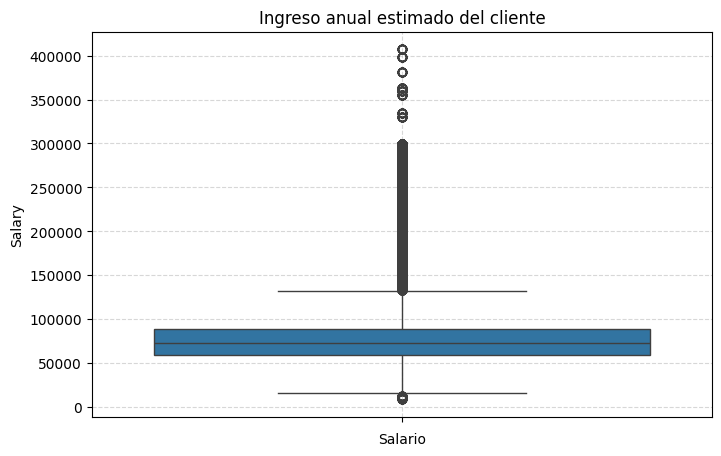

In [ ]:
# Creo un boxplot para visualizar si la columna "salary" tiene valores atípicos (outliers)

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_flight["Salary"])
plt.title("Ingreso anual estimado del cliente")
plt.xlabel("Salario")
plt.grid(True, linestyle='--', alpha=0.5)  # para leerlo mejor
plt.show()

In [61]:
# Voy a rellenar los datos de la columna "Salary" con la mediana
df_flight.loc[:, "Salary"] = df_flight["Salary"].fillna(df_flight["Salary"].median())

In [62]:
#Comprobamos que ya no hay valores nulos en la columna "salary"
df_flight["Salary"].isna().sum()

np.int64(0)

In [63]:
# Comprobamos de nuevo para ver los valores mínimo, máximo, media, mediana
df_flight["Salary"].describe()

count    403760.000000
mean      77879.284748
std       30117.567539
min        9081.000000
25%       63901.000000
50%       73479.000000
75%       82940.000000
max      407228.000000
Name: Salary, dtype: float64

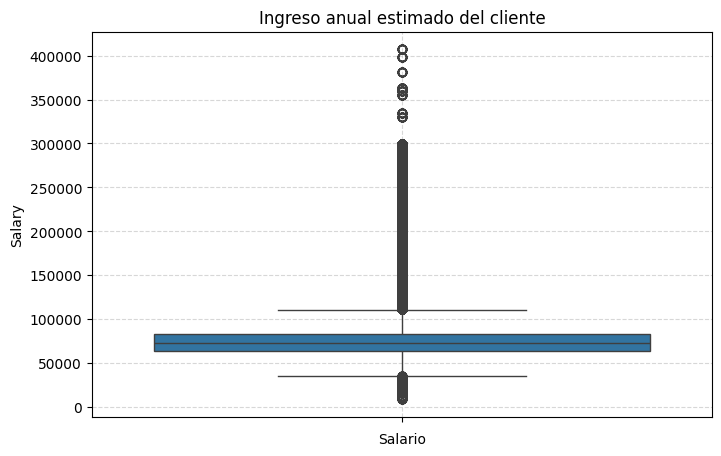

In [65]:
# Creamos de nuevo el boxplot para ver cómo han quedado los nulos
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_flight["Salary"])
plt.title("Ingreso anual estimado del cliente")
plt.xlabel("Salario")
plt.grid(True, linestyle='--', alpha=0.5)  # Para mejor lectura
plt.show()

In [ ]:
# La línea de la mediana (centro de la caja) no cambia de posición (porque la mediana no se ve afectada), lo que cambia es que ahora hay más puntos exactamente en la mediana, ya que los huecos se rellenaron con ese valor
# El boxplot no cambia mucho en la forma, pero ahora no hay huecos en Salary

In [ ]:
# Hacemos un EDA para tener una visión general rápida del DataFrame
def eda_ejercicio(df):
    print('Datos del DF:')
    display(df.head(3))
    display(df.tail(3))
    display(df.sample(3))
    
    print('Número de Filas:')
    display(df.shape[0])
    
    print('Número de Columnas:')
    display(df.shape[1])
    
    print('Información de la tabla:')
    display(df.info())
    
    print('Nombre de las columnas:')
    display(df.columns)
    
    print('Descripción de los datos numéricos:')
    display(df.describe().T)
    
    print('Descripción de los datos categóricos:')
    display(df.describe(include='object').T)
    
    print('Saber si hay datos únicos:')
    display(df.nunique())
    
    print('Qué datos son nulos por columnas:')
    display(df.isnull().sum())
    
    print('Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    
    print('Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')
    
    print('Valores únicos en columnas categóricas:')
    for col in df.select_dtypes(include='object'):
        print(f'{col}')
        print(df[col].unique())
        
    print('Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    

In [69]:
eda_ejercicio(df_flight)

Datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,M1R 4K3,Male,College,73479.0,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,U5I 4F1,Female,College,73479.0,Divorced,Nova,2838.07,Standard,2016,7


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
405621,999940,2018,12,3,0,3,1233,123.0,0,0,...,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7
405622,999982,2018,12,0,0,0,0,0.0,0,0,...,V10 6T5,Male,College,73479.0,Married,Star,2631.56,Standard,2018,7
405623,999986,2018,12,0,0,0,0,0.0,0,0,...,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
120450,213432,2017,8,0,0,0,0,0.0,0,0,...,V6E 3D9,Female,Bachelor,95373.0,Married,Star,7263.60,Standard,2013,10
67717,105992,2017,5,0,0,0,0,0.0,0,0,...,M9K 2P4,Female,Bachelor,75700.0,Married,Nova,5905.97,Standard,2016,12
347513,605723,2018,9,5,4,9,1197,119.0,0,0,...,K8T 5M5,Male,College,73479.0,Married,Star,30205.01,Standard,2014,1


Número de Filas:


403760

Número de Columnas:


23

Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 no

None

Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


Descripción de los datos categóricos:


,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


Saber si hay datos únicos:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
dtype: int64

Qué datos son nulos por columnas:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
dtype: int64

Filas duplicadas:
No hay duplicados
Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

Valores únicos en columnas categóricas:
Country
-----------------------------
['Canada']
Province
-----------------------------
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
City
-----------------------------
['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Quebec City' 'Peace River' "St. John's" 'Tremblant' 'Ottawa'
 'Trenton' 'Winnipeg' 'Thunder Bay' 'West Vancouver' 'Fredericton'
 'London' 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler'
 'Charlottetown' 'Hull' 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
Postal Code
-----------------------------
['T9G 1W3' 'M1R 4K3' 'U5I 4F1' 'V5R 1W3' 'P1L 8X8' 'P1J 8T7' 'S6J 3G0'
 'H2T 9K8' 'V6E 3D9' 'M5V 1G5' 'H2Y 4R4' 'M8Y 4K8' 'V6E 3Z3' 'G1B 3L5'
 'T9O 2W2' 'A1C 6H9' 'H5Y 2S9' 'K1F 2R2' 'K8V 4B2' 'R3R 3T4' 'P1W 1K4'
 'K8T 5M5' 'V6V 8Z3' 'M2M 7K8' 'E3B 2H2' 'M5B 3E4' 'H2Y 2W2' 'P5S 6R4'
 'P2T 6G3' 'B3J 9S2

int64      11
object      9
float64     3
Name: count, dtype: int64

In [70]:
df_flight['Salary'].sample(5)

387570    55701.0
357627    66845.0
327415    94382.0
359088    73479.0
252722    73479.0
Name: Salary, dtype: float64

In [74]:
# Creo una función para cambiar el tipo de dato
def cambiar_dato(columna, tipo):
    try:
        if tipo == "int":
            df_flight.loc[:, columna] = df_flight[columna].astype(int)
        elif tipo == "object":
            df_flight.loc[:, columna] = df_flight[columna].astype(str)
        elif tipo == "datetime":
            df_flight.loc[:, columna] = pd.to_datetime(df_flight[columna], errors='coerce')
        elif tipo == "float":
            df_flight.loc[:, columna] = df_flight[columna].astype(float)
        else:
            print("Solo se acepta: int, object, datetime o float")
    except:
        print("Hay nulos")

In [75]:
# Paso las columnas "Points Accumulated" y "Salary" a enteros
columnas_int = ['Points Accumulated', 'Salary']
for columna in columnas_int:
    cambiar_dato(columna, 'int')
    print(f'El dato se ha cambiado correctamente')

El dato se ha cambiado correctamente
El dato se ha cambiado correctamente


In [76]:
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

In [78]:
# Le cambio el nombre a este DataFrame para que sea más fácil de interpretar en las gráficas posteriores
df = df_flight.copy()

In [ ]:
# Guardo el CSV limpio para realizar las gráficas posteriores de la segunda Fase del ejercicio técnico
df_flight.to_csv("Analisis_clientes.csv")

In [83]:
df_flight

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73479,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479,Married,Aurora,7290.07,Standard,2014,5
405620,999911,2018,12,0,0,0,0,0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943,Single,Nova,8564.77,Standard,2012,8
405621,999940,2018,12,3,0,3,1233,123,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670,Married,Nova,20266.50,Standard,2017,7
405622,999982,2018,12,0,0,0,0,0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,73479,Married,Star,2631.56,Standard,2018,7


In [84]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas del DataFrame

In [85]:
# Abro el CSV limpio que he creado
df = pd.read_csv("Analisis_clientes.csv", index_col = None)
df.head(5)

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.20,Standard,2016,8
1,1,100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479,Single,Nova,2887.74,Standard,2013,3
2,2,100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73479,Divorced,Nova,2838.07,Standard,2016,7
3,3,100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253,Married,Star,4170.57,Standard,2015,8
4,4,100272,2017,1,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163,Divorced,Star,6622.05,Standard,2014,1


In [86]:
# Hago un describe para ver los principales datos estadísticos de las columnas
df.describe()

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month
count,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000
mean,202898.948918,549875.383713,2017.500352,6.501335,4.134050,1.036569,5.170619,1214.460979,124.237924,30.838587,2.495973,77879.284748,7990.864857,2015.250716,6.667555
std,117092.154422,258961.514684,0.500000,3.451982,5.230064,2.080472,6.526858,1434.098521,146.675448,125.758002,10.172033,30117.567539,6863.317160,1.979427,3.398829
min,0.000000,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9081.000000,1898.010000,2012.000000,1.000000
25%,101508.750000,326699.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63901.000000,3981.780000,2014.000000,4.000000
50%,202928.500000,550598.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,525.000000,53.000000,0.000000,0.000000,73479.000000,5776.340000,2015.000000,7.000000
75%,304328.250000,772152.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2342.000000,240.000000,0.000000,0.000000,82940.000000,8937.120000,2017.000000,10.000000
max,405623.000000,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.000000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000


 Fase 2: Visualización
 Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
 gráficas usando la mejor gráfica que consideres:

 1) ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [90]:
#Asigno un color a cada mes para que la gráfica se vea mejor
colores_meses = [

'#0000FF',  # Azul (Enero)
'#007FFF',  # Azul claro (Febrero)
'#00CED1',  # Turquesa (Marzo)
'#00FF00',  # Verde (Abril)
'#FF7F00',  # Naranja (Mayo)
'#FFD700',  # Oro (Junio)
'#FFFF00',  # Amarillo (Julio)
'#FF0000',   # Rojo (Agosto)
'#FF04A7',  # Rosa  (Septiembre)
'#A52A2A',   # Marrón rojizo (Octubre)
'#8A2BE2',  # Violeta (Noviembre)
'#4B0082',  # Morado (Diciembre)
]

Total de Vuelos Reservados por Año y Mes:
        Month  Flights Booked
0           1               3
1           1              10
2           1               6
3           1               0
4           1               0
...       ...             ...
403755     12               0
403756     12               0
403757     12               3
403758     12               0
403759     12               0

[403760 rows x 2 columns]


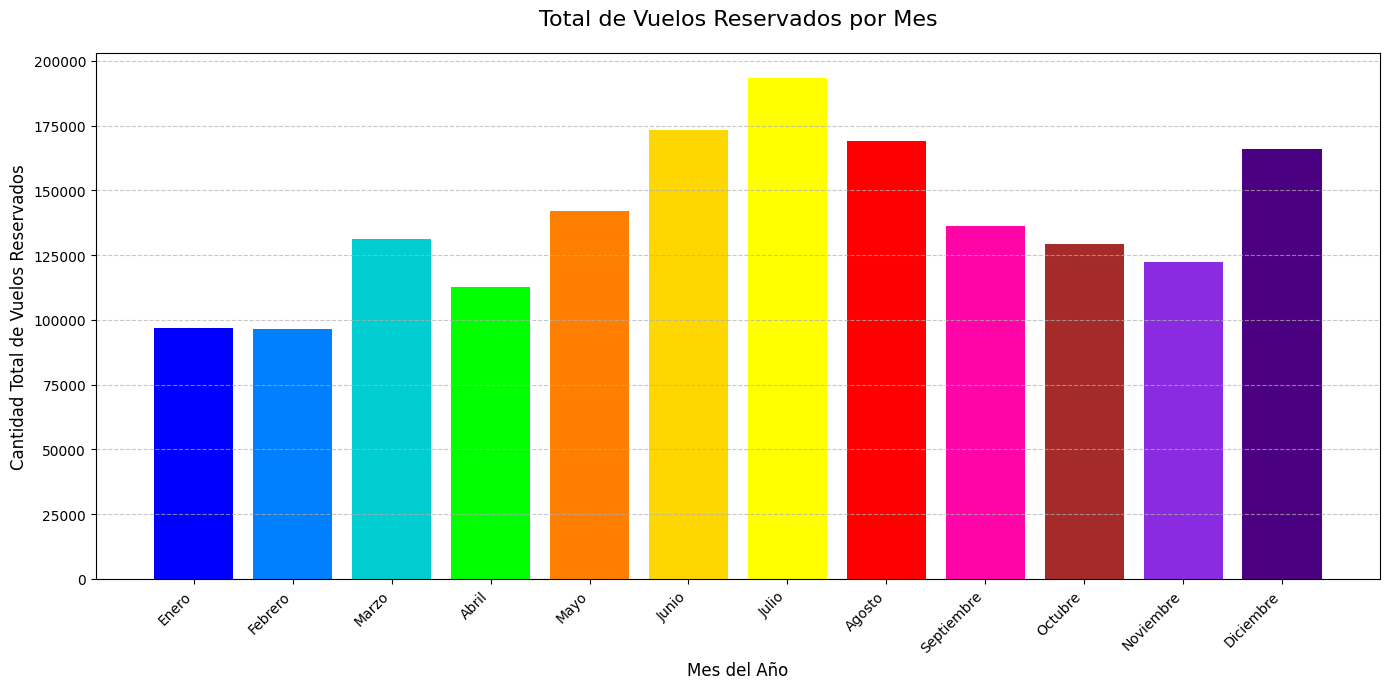

In [91]:
# Creo un nuevo DataFrame con el mes y los vuelos reservados
df_grafico1 = df[['Month', 'Flights Booked']]
   
# Quiero que me sume los vuelos que ha habido en los diferentes meses de los años 2017 y 2018
df_graf1 = df_grafico1.groupby('Month')['Flights Booked'].sum().reset_index()
print("Total de Vuelos Reservados por Año y Mes:")
print(df_grafico1)

# Le paso la lista de los meses para visualizarlos en la X de la gráfica
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(14, 7))

# Creo un bar chart
plt.bar(meses, df_graf1['Flights Booked'], color=colores_meses)

plt.title('Total de Vuelos Reservados por Mes', fontsize=16, pad=20)
plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('Cantidad Total de Vuelos Reservados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Los meses con mayor vuelos reservados son en julio con casi 200.000, seguido de junio con 175.000. En el otro extremo tenemos enero y febrero con algo menos de 100.000 siendo los meses con menor número de vuelos reservados.
# Se observa que la cantidad de vuelos reservados aumenta casi progresivamente, con un ligero descenso en abril, de enero hasta julio, alcanza un pico en verano y luego va disminuyendo hacia finales de año donde remonta de nuevo.
# Hay un patrón estacional con un pico en verano siendo la estación cuando más vacaciones tiene la población y menor actividad durante los meses de otoño. Los vuelos reservados aumentan una vez más durante diciembre coincidiendo de nuevo con las vacaciones por Navidad.
# Cabe destacar también, la diferencia entre el mes con más vuelos reservados (julio con casi 200.000) y el mes con menos (enero con algo menos de 100.000) es aproximadamente el doble.

 2) ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

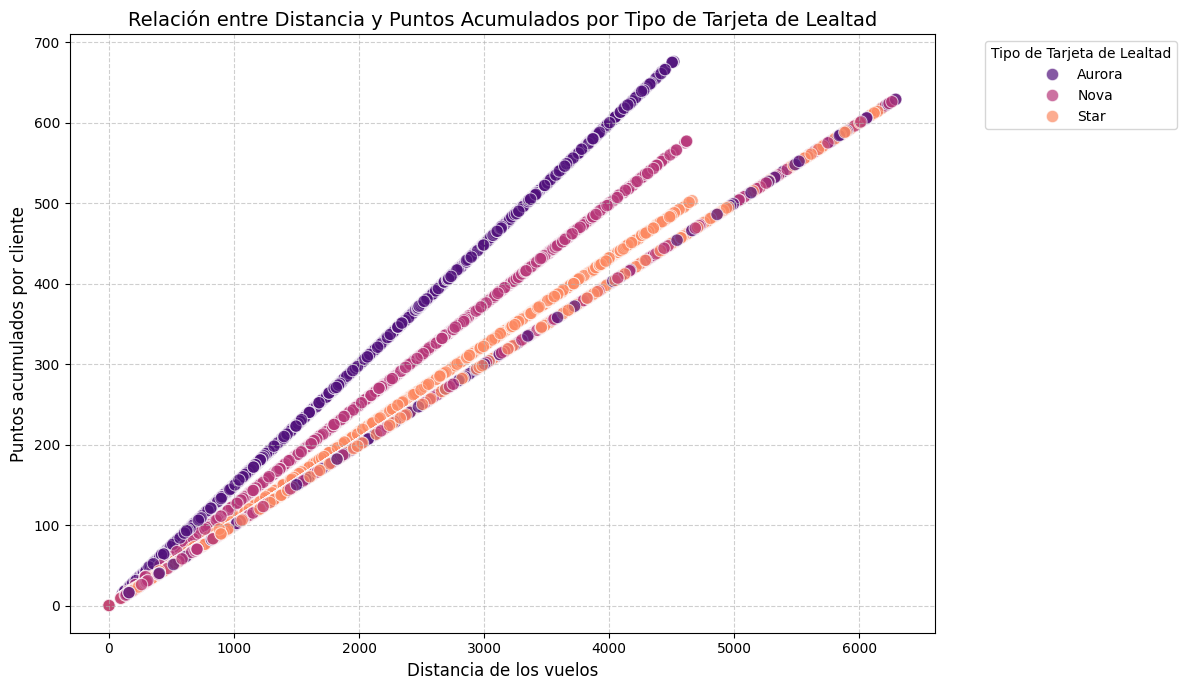

In [ ]:
# Creo un scatter plot para ver si hay algún patrón o tendencia, y para ver el tipo de distribución
plt.figure(figsize=(12, 7)) # Tamaño de la figura

# 'Hue="Loyalty Card"' para diferenciar los tipo de tarjeta
sns.scatterplot(x="Distance", y="Points Accumulated", data=df,
                hue="Loyalty Card",
                palette="magma",  
                s=80,                # Tamaño de los puntos
                alpha=0.7)           # Transparencia de los puntos

# Cambio los nombres de los ejes
plt.xlabel("Distancia de los vuelos", fontsize=12)
plt.ylabel("Puntos acumulados por cliente", fontsize=12) 
plt.title("Relación entre Distancia y Puntos Acumulados por Tipo de Tarjeta de Lealtad", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6) # para facilitar la lectura

# Añado una leyenda para 'Loyalty Card'. Con "upper left" la coloco fuera del gráfico
plt.legend(title="Tipo de Tarjeta de Lealtad", bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.tight_layout()
plt.show()

In [ ]:
# Al observar la gráfica, se aprecia una relación positiva entre la distancia de los vuelos y los puntos acumulados: cuanto mayor es la distancia, más puntos acumula el cliente
# Además, los distintos colores muestran que el tipo de tarjeta de lealtad también influye en la cantidad de puntos: los clientes con tarjeta Aurora, los puntos de color morado, tienden a acumular más puntos que el resto de tarjetas. Esto sugiere que la tarjeta Aurora corresponde al nivel más alto del programa de lealtad.

3)  ¿Cuál es la distribución de los clientes por provincia o estado?

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_5572\4115772171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Province", data=df,


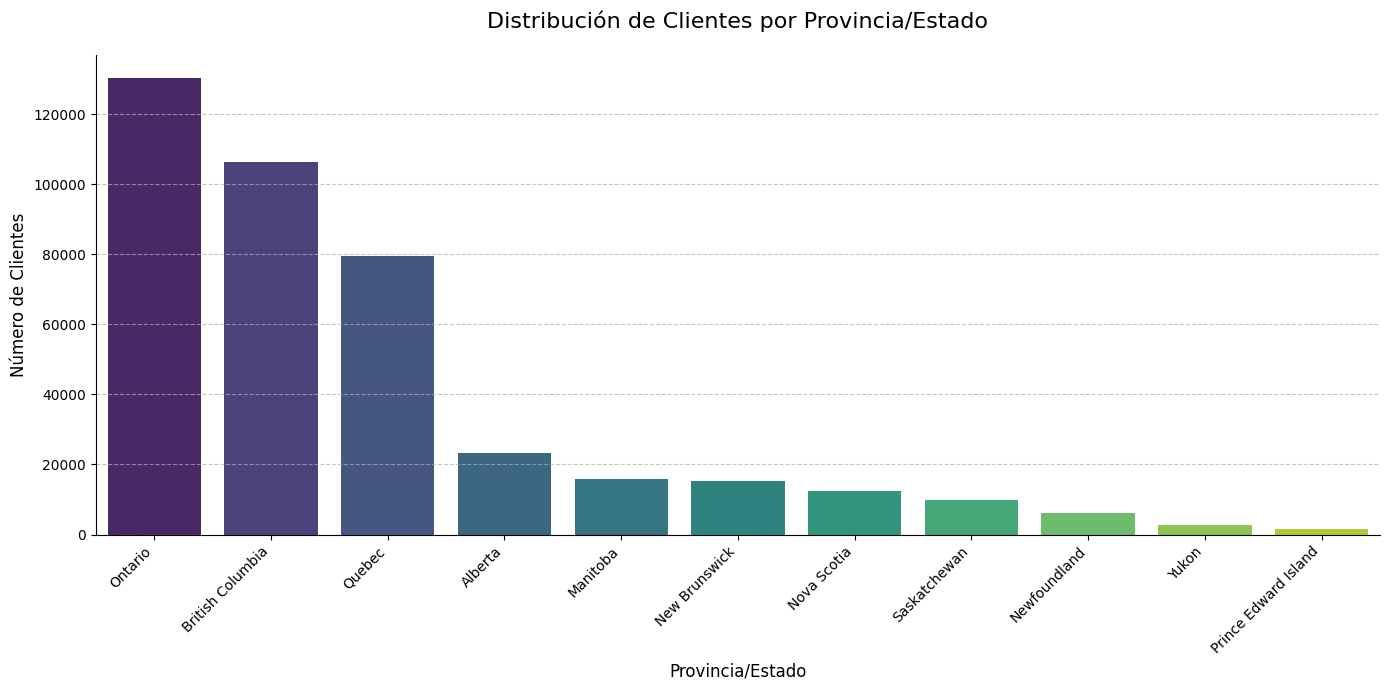

In [94]:
plt.figure(figsize=(14, 7))

# Creo un countplot para sumar los clientes que hay por provincia o por estado
# 'x="Provincia"' Cuenta los valores en la columna 'Provincia'
sns.countplot(x="Province", data=df,
              palette="viridis", # La paleta de colores
              order=df['Province'].value_counts().index) # Ordena las barras de mayor a menor recuento

sns.despine(top=True, right=True) # Elimino las líneas de arriba y de la derecha

# Añado etiquetas y título
plt.title("Distribución de Clientes por Provincia/Estado", fontsize=16, pad=20)
plt.xlabel("Provincia/Estado", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12)

# Muevo las etiquetas del eje X para que no se solapen
plt.xticks(rotation=45, ha='right', fontsize=10) # 'ha=right' alinea el texto a la derecha del tick
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula solo en el eje Y

plt.tight_layout() # Elementos bien ajustados dentro de la figura
plt.show()

In [ ]:
#La mayoría de los clientes se concentran en las provincias de Ontario y British Columbia, que son las que muestran las barras más altas. En contraste, las provincias Yukon y Prince Edward Island tienen un número mucho menor de clientes. La distribución no es uniforme: unas pocas provincias concentran la mayoría de los clientes, mientras que el resto tienen una representación menor.
# Estos resultados coinciden prácticamente con el volumen de población de cada provincia: Ontario es la provincia con mayor población de Canadá y British Columbia la tercera.
# Mientras que Prince Edward Island es la provincia menos poblada de todo el país.

4)  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [95]:
# Primero vemos los valores que tiene la columna "Education"
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_5572\1486559883.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="Salary", data=df_clientes_unicos,


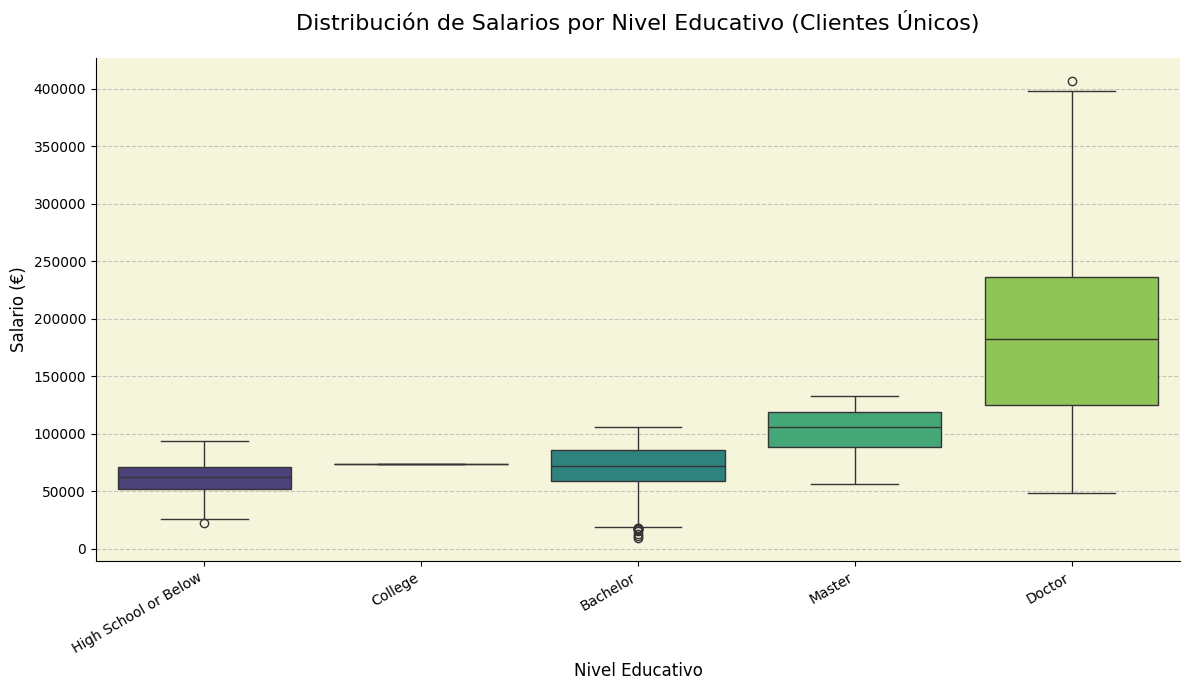

In [96]:
# Como hay clientes que han reservado varios vuelos, por cada cliente puede haber múltiples respuestas
# Creo el DataFrame de clientes únicos y le pido que elimine los duplicados
df_clientes_unicos = df.drop_duplicates(subset=['Loyalty Number'])

# Creo la figura y los ejes para tener control sobre el fondo interior
fig, ax = plt.subplots(figsize=(12, 7))

ax.set_facecolor('beige') # Establezco el color del interior del gráfico)

# Defino el orden lógico para los niveles educativos: del colegio o menos al mayor nivel educativo que hay (doctorado)
orden_educacion = [
    'High School or Below',
    'College',
    'Bachelor',
    'Master',
    'Doctor'
]

# Uso un boxplot para ver la mediana, los cuartiles, el rango y los posibles valores atípicos de los salarios para cada nivel educativo. 
sns.boxplot(x="Education", y="Salary", data=df_clientes_unicos,
            palette="viridis", # Uso una paleta de colores para las cajas
            order=orden_educacion, # Usa el orden que has definido
            ax=ax) # Dibuja en los ejes 'ax'

# Elimino las líneas (spines) de arriba y de la derecha
sns.despine(top=True, right=True, ax=ax)

# Añado etiquetas y título
ax.set_title("Distribución de Salarios por Nivel Educativo (Clientes Únicos)", fontsize=16, pad=20)
ax.set_xlabel("Nivel Educativo", fontsize=12)
ax.set_ylabel("Salario (€)", fontsize=12) # Etiqueta que muestra la distribución

# Muevo las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y

plt.tight_layout() # Para que todos los elementos se ajusten bien
plt.show()

In [ ]:
# comprobación de por qué college sale así en el boxplot

In [97]:
df_clientes_unicos.groupby("Education")["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
College,4238.0,73479.000000,0.000000,73479.0,73479.00,73479.0,73479.0,73479.0
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


In [98]:
# Calculo la mediana general de la columna Salary
mediana_salary = df_clientes_unicos["Salary"].median()
print("Mediana general de Salary:", mediana_salary)

# Verifico si coincide con el valor fijo de College
valor_college = df_clientes_unicos.loc[df_clientes_unicos["Education"] == "College", "Salary"].unique()
print("Valor de Salary en College:", valor_college)


Mediana general de Salary: 73479.0
Valor de Salary en College: [73479]


In [ ]:
# La caja de College sale como una línea plana: eso pasa porque probablemente solo hay un único valor de salario para los clientes con ese nivel educativo. Esto acaba de pasar porque los nulos de College se rellenaron con la mediana, y como todos los de ese grupo tenían nulos, se quedaron con el mismo valor.
# Se observa que la dispersión de salarios es muy distinta entre niveles educativos: High School or Below: salarios más bajos y concentrados, Bachelor y Master: suben y tienen más rango, Doctor: muchísima dispersión (salarios desde 50.000 hasta más de 400.000 (Eso explica que la caja de Doctor sea tan grande y tenga bigotes largos)

5)  ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

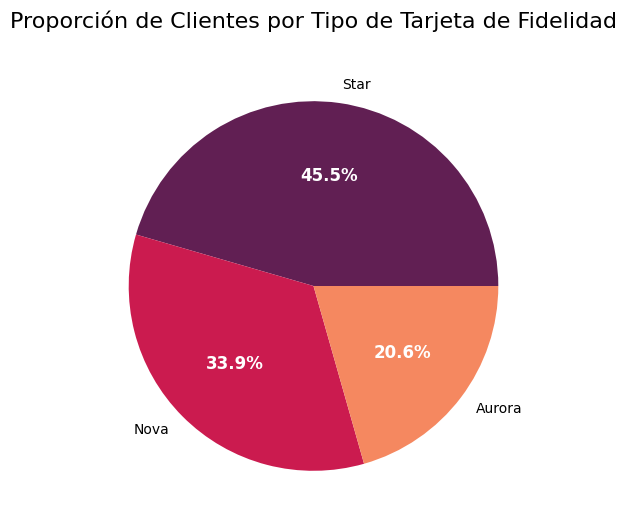

In [102]:
# Hago un recuento de cada tipo de tarjeta de lealtad
conteo_tarjetas = df['Loyalty Card'].value_counts()

# Calculo los porcentajes
porcentajes = conteo_tarjetas 
conteo_tarjetas.sum() * 100

# Creo un diccionario para que ponga el conteo y los porcentajes en un DataFrame con el fin de facilitar el etiquetado
df_conteo = pd.DataFrame({
    'Cantidad': conteo_tarjetas,
    'Porcentaje': porcentajes
}).reset_index()
df_conteo.columns = ['Tipo_Tarjeta', 'Cantidad', 'Porcentaje'] # Renombro las columnas

# Creo el subplot, porque me permite organizar y comparar visualizaciones de diferentes aspectos
fig, ax = plt.subplots(figsize=(6, 6)) # Ajusto el tamaño

wedges, texts, autotexts = ax.pie(
    df_conteo['Cantidad'],
    labels=df_conteo['Tipo_Tarjeta'], # Etiquetas para cada sector
    autopct='%1.1f%%', # Formato para mostrar el porcentaje en cada sector
    colors=sns.color_palette("rocket", len(df_conteo)), # Usa una paleta de colores de seaborn
)

# Estilo de los porcentajes
for autotext in autotexts:
    autotext.set_color('white') # Color del texto del porcentaje
    autotext.set_fontsize(12)   # Tamaño del texto del porcentaje
    autotext.set_weight('bold') # Negrita para el porcentaje

# Añado un título
ax.set_title("Proporción de Clientes por Tipo de Tarjeta de Fidelidad", fontsize=16, pad=20)


plt.show()

In [ ]:
#Se puede observar claramnte que el mayor porcentaje de clientes procede de la tarjeta de fidelidad Star. Seguido por la Nova y siendo Aurora la que menos clientes tiene.
# Esto nos hace pensar que posiblemente Star sea la subscripción más barata, la Nova tendría un precio intermedio y Aurora sea probablemente la más cara; por lo que más clientes preferirían pagar menos.

6)  ¿Cómo se distribuyen los clientes según su estado civil y género?

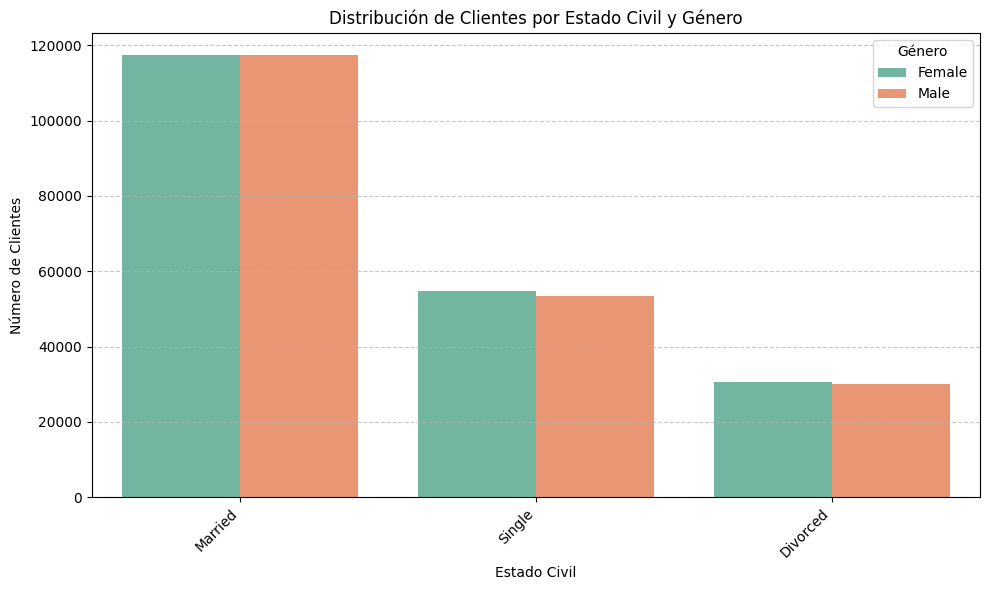

In [104]:
# Uso una gráfica countplot para agrupar y comparar dos categorías al mismo tiempo

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital Status', hue='Gender', palette='Set2') # Al poner el género en HUE es más visual e introduzco una nueva categoría
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Podemos observar que la mayoría de clientes se concentran en el grupo casados/as, donde el número de hombres y mujeres es prácticamente igual, alrededor de 115.000 cada uno, por lo que no hay diferencias de género significativas.
#En el grupo de solteros/as, las mujeres son ligeramente más numerosas, con unas 55.000 frente a 50.000 de hombres.
#En el grupo de no casados/as, también predominan las mujeres, con aproximadamente 30.000 frente a 25.000 de hombres.